In [1]:
from __future__ import division
from sklearn import linear_model
from scipy import stats
from scipy.special import boxcox, inv_boxcox
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
data = np.loadtxt("./Geographical Original of Music/default_plus_chromatic_features_1059_tracks.txt",delimiter=",",skiprows=0)
num_row,num_feature = data.shape[0],data.shape[1]-2
x = data[:,:num_feature]
y = data[:,num_feature:]
latitude = y[:,0]
longitude = y[:,1]
# add a column of ones to x
# x = np.append(x,np.ones((num_row,1)),axis=1)

In [3]:
# Create linear regression object
regr = linear_model.LinearRegression()
def regress(x,y,y_label):
    regr.fit(x,y)
    print "R squared: " + str(regr.score(x,y))
    # Plot outputs
    fig = plt.figure()
    plt.scatter(y, regr.predict(x), color='blue')
    plt.xlabel(y_label)
    plt.ylabel('predicted')

R squared: 0.292809200484


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


<IPython.core.display.Javascript object>


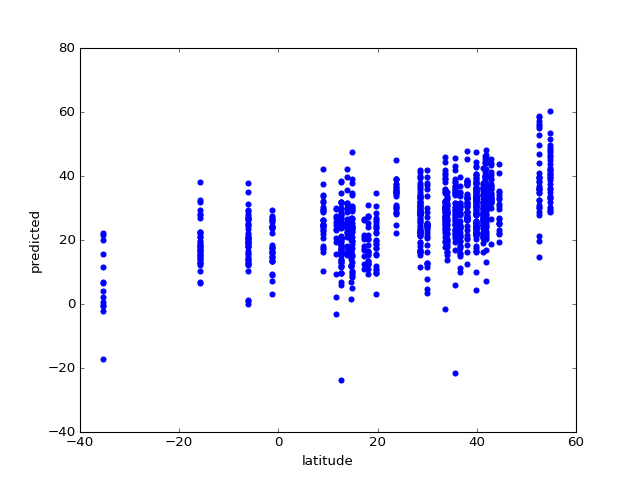

In [4]:
regress(x,latitude,'latitude')

R squared: 0.364576702965


<IPython.core.display.Javascript object>


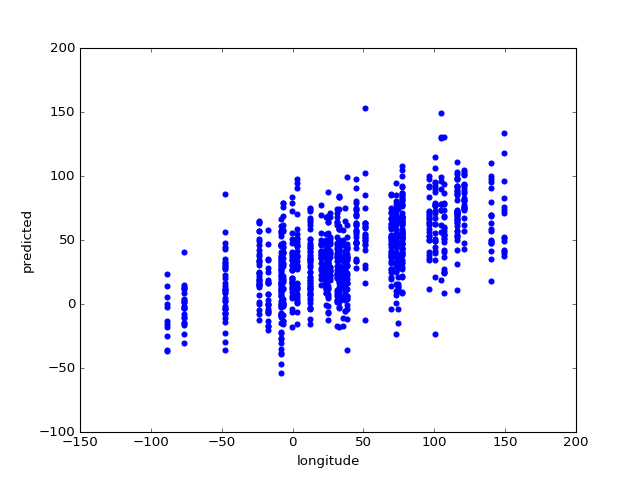

In [5]:
regress(x,longitude,'longitude')

In [6]:
def boxcox(x,y,y_label):
    box_cox, maxlog = stats.boxcox(y + abs(min(y)) + 1)
    regr.fit(x,box_cox)
    box_cox_predict = regr.predict(x)
    y_predict = inv_boxcox(box_cox_predict,maxlog) - abs(min(y)) - 1
    print "R squared: " + str(np.var(y_predict)/np.var(y))
    # Plot outputs
    fig = plt.figure()
    plt.scatter(y, y_predict, color='blue')
    plt.xlabel(y_label)
    plt.ylabel('predicted')

R squared: 0.250766639809


<IPython.core.display.Javascript object>


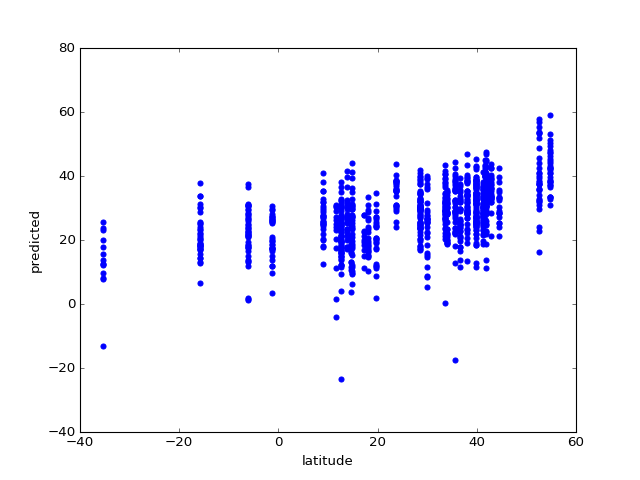

In [7]:
boxcox(x,latitude,'latitude')

R squared: 0.368570724885


<IPython.core.display.Javascript object>


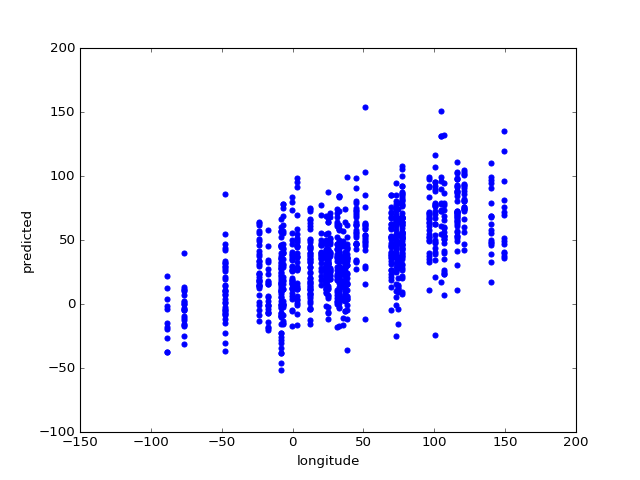

In [8]:
boxcox(x,longitude,'longitude')

In [ ]:
# ridge regression
